In [35]:
import pandas as pd
from numpy import nan
from string import punctuation
punctuation += '\"“”‘’—-–'

def kill_punctuations_capitals(string): 
    string = string.replace("’s","") 
    translator = str.maketrans("","",punctuation) 
    return string.lower().translate(translator)

def check_real(string, real_check_list):
    j = 0
    for i in real_check_list:
        j += kill_punctuations_capitals(string).find(i)
    return j > -len(real_check_list)

def count_frequency(text):
    def kill_punctuations_capitals(text): 
        global punctuation
        punctuation += '\"“”‘’—-–·`'
        translator = str.maketrans("","",punctuation) 
        return text.replace("’s","").translate(translator).lower().split() 
        #去除‘s，去除標點，將大寫字母轉化為小寫，列出單詞

    def words_frequency(list):  #去除stopwords統計一篇文章中的frequency
        with open ('stopword.txt','r') as s:
            list_stop_words = s.read().split()  #讀取stoplist
        return {m: list.count(m) for m in [
                m for m in list if m not in list_stop_words]}

    def rank_frequency(dict): 
        dict_frequency_rank={}
        rank = sorted(
            dict.items(), 
            key=lambda item: item[1], 
            reverse=True) 
        #將字典轉化爲二元數組，並根據字典中value排序
        for m in range(0,len(rank)):
            dict_frequency_rank.update({
                rank[m][0]:rank[m][1]}) 
            #再將字典重新整合起來
        return dict_frequency_rank
    
    return rank_frequency(
        words_frequency(
            kill_punctuations_capitals(text)))

In [56]:
# 筛选真正的记者职位
df_all_jobs = pd.read_csv("0 jobs.csv",header=0)

real_check_list = ['data']

df_all_jobs['Real'] = [
    check_real(i[1][0], real_check_list) for i in df_all_jobs.iterrows()] 
# .iterrows()可以根据index遍历, df_all_jobs.iterrows()是[(0,series),(1,series)...], 
# i是(0,series), i[1]是series, i[1][0]是Title

df_selected_jobs = df_all_jobs[
    df_all_jobs['Real']==True].sort_values(
        by='Post_Date',ascending=False)

df_selected_jobs.to_csv(
    '1 new-selected-jobs.csv',
    na_rep = nan,
    index=False)

In [6]:
#统计关键词的frequency
key_words = [
    'data',
    'dataset',
    'data analysis',]

df_selected_jobs = pd.read_csv("1 new-selected-jobs.csv")

df_key_frequency = df_selected_jobs.drop(
    'Description',
    axis=1,
    inplace=False)  #False 代表不在原数据上保存

list_jobs_frequency = [
    count_frequency(i) for i in df_selected_jobs['Description']]

df_key_frequency = df_key_frequency.join(
    pd.DataFrame([[
        m.get(i) or nan for m in list_jobs_frequency] 
        for i in key_words],
        index=key_words).T)

df_key_frequency.to_csv(
    '2 jobs-{}-frequency.csv'.format('-'.join(key_words)),
    na_rep = nan,
    index=False)
df_key_frequency

,Title,Company,Location,Post_Date,URL,Current Status,Source,Real,data,dataset,data analysis
0,Copywriter/Editor,Crawford Group,"Newark, CA",2018-11-14 14:37:34,https://www.indeed.com/viewjob?jk=d8ac5ebcd62d...,NaN,indeed,True,NaN,NaN,NaN
1,Reporter,"KSTP-TV, LLC","Saint Paul, MN 55114 (Saint Anthony area)",2018-11-14 07:37:10,https://www.indeed.com/viewjob?jk=f3bc6f3dad6a...,NaN,indeed,True,NaN,NaN,NaN
2,P/T Photographer/Editor,Nexstar Broadcasting,"Salt Lake City, UT",2018-11-14 05:37:51,https://www.indeed.com/viewjob?jk=fa98fdfebbf4...,NaN,indeed,True,NaN,NaN,NaN
3,News Production Assistant,Nexstar Broadcasting,"East Syracuse, NY",2018-11-14 05:37:19,https://www.indeed.com/viewjob?jk=31cf5df37d0c...,NaN,indeed,True,1.0,NaN,NaN
4,Multimedia Journalist,Nexstar Broadcasting,"Myrtle Beach, SC",2018-11-14 05:37:04,https://www.indeed.com/viewjob?jk=a6c1b845b560...,NaN,indeed,True,NaN,NaN,NaN
5,KTAB Multimedia Journalist,Nexstar Broadcasting,"Abilene, TX",2018-11-14 05:37:04,https://www.indeed.com/viewjob?jk=0ddea462ed20...,NaN,indeed,True,NaN,NaN,NaN
6,KPBS Video Journalist,SDSU Research Foundation,"San Diego, CA",2018-11-14 03:37:12,https://www.indeed.com/viewjob?jk=eae9e09927c0...,NaN,indeed,True,NaN,NaN,NaN
7,News & Strategic Communications Coordinator,Scripps College,"Claremont, CA 91711",2018-11-14 02:38:16,https://www.indeed.com/viewjob?jk=287a395946a4...,NaN,indeed,True,NaN,NaN,NaN
8,Credit/Finance Reporter,Refinitiv,"New York, NY",2018-11-14 02:37:27,https://www.indeed.com/viewjob?jk=e4297323040b...,NaN,indeed,True,2.0,NaN,NaN
9,Anchor/Reporter,Univision communications inc,United States,2018-11-14 02:37:04,https://www.indeed.com/viewjob?jk=78fa09c85203...,NaN,indeed,True,NaN,NaN,NaN


In [40]:
#统计所有的frequency
import pandas as pd
df_selected_jobs = pd.read_csv("1 new-selected-jobs.csv")
dict_frequency = count_frequency(df_selected_jobs['Description'].sum())
df_frequency = pd.DataFrame(list(dict_frequency.items()))
df_frequency.index=range(1,len(df_frequency) + 1)
df_frequency.to_csv('3 description-frequency-rank.csv')
df_frequency.head(50)

,0,1
1,data,190
2,experience,93
3,work,65
4,team,63
5,skills,40
6,news,38
7,journalism,36
8,new,31
9,science,29
10,help,27


In [64]:
import pandas as pd
lista=[
    'data','program','stor','writ','video','visual','digital',
    'edit','event','business','daily','report','research',
    'idea','social','knowledge','experience',
    'team','responsibilit','local','national',
]

df = pd.DataFrame(0,lista,lista)
listd = list(pd.read_csv('1 new-selected-jobs.csv')['Description'])
for des in listd:
    for m in lista:
        for n in lista:
            if m in des.lower() and n in des.lower():
                df.loc[m,n] += 1
df.to_csv('net.csv')

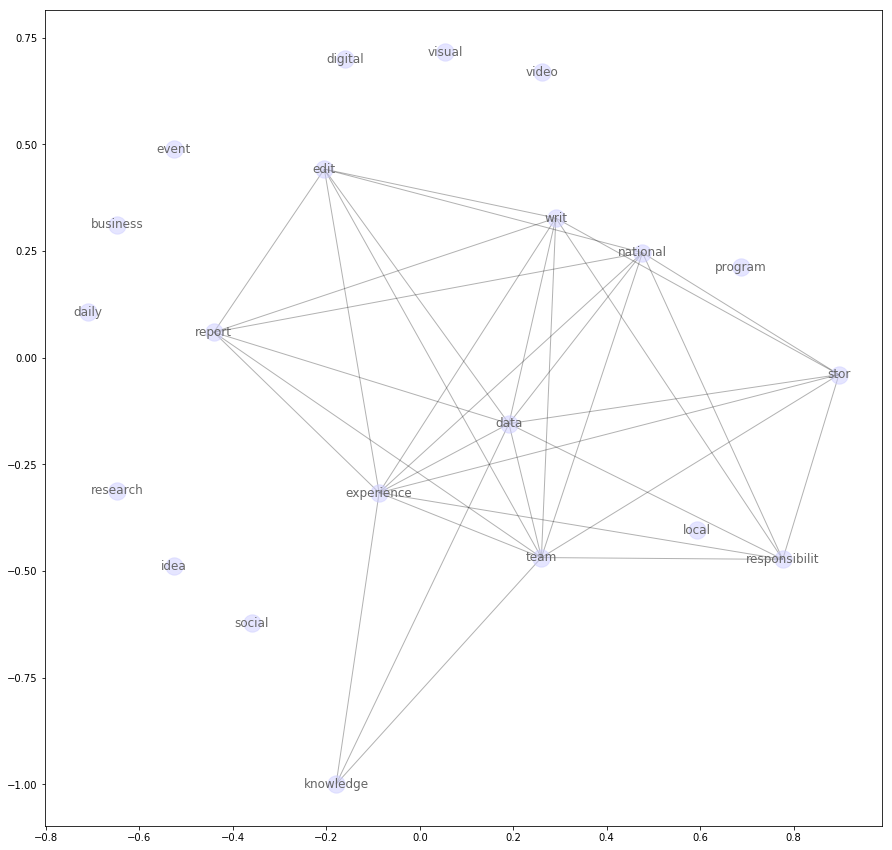

In [67]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

lista=[
    'data','program','stor','writ','video','visual','digital',
    'edit','event','business','daily','report','research',
    'idea','social','knowledge','experience',
    'team','responsibilit','local','national',
]
df=pd.read_csv('net.csv',index_col='Unnamed: 0')
for m in lista:
    for n in lista:
        if df.loc[m,n] >= 10:
            df.loc[m,n] = 1
        else:
            df.loc[m,n] = 0
h = nx.from_numpy_matrix(df.values)
g = nx.relabel_nodes(h, dict(enumerate(df.columns)))

plt.figure(figsize=(15, 15))
pos =nx.kamada_kawai_layout(g)
# nx.draw(g, pos=nx.spring_layout(g))
nx.draw_networkx_nodes(g, pos, node_color='#ccccff', alpha=0.5) #change nodes style
nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.3) #change edges style
labels = dict([(n, n) for n in g.nodes]) #add labels
_ = nx.draw_networkx_labels(g, pos, labels=labels, font_color='#666666') #draw labels


In [48]:
help(nx.layout)

Help on module networkx.drawing.layout in networkx.drawing:

NAME
    networkx.drawing.layout

DESCRIPTION
    ******
    Layout
    ******
    
    Node positioning algorithms for graph drawing.
    
    For `random_layout()` the possible resulting shape
    is a square of side [0, scale] (default: [0, 1])
    Changing `center` shifts the layout by that amount.
    
    For the other layout routines, the extent is
    [center - scale, center + scale] (default: [-1, 1]).
    

FUNCTIONS
    circular_layout(G, scale=1, center=None, dim=2)
        Position nodes on a circle.
        
        Parameters
        ----------
        G : NetworkX graph or list of nodes
            A position will be assigned to every node in G.
        
        scale : number (default: 1)
            Scale factor for positions.
        
        center : array-like or None
            Coordinate pair around which to center the layout.
        
        dim : int
            Dimension of layout.
            If d

In [54]:
import networkx as nx
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 15))
pos =nx.spring_layout(g)
# nx.draw(g, pos=nx.spring_layout(g))
nx.draw_networkx_nodes(g, pos, node_color='#ccccff', alpha=0.5) #change nodes style
nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.3) #change edges style
labels = dict([(n, n) for n in g.nodes]) #add labels
_ = nx.draw_networkx_labels(g, pos, labels=labels, font_color='#666666') #draw labels

In [41]:
des = 'Desired: CopywritingSEOCrawford Group (www.crawfordgroup.com) is seeking a freelance Copywriter/Editor with a successful brand-building portfolio for our client in Newark, CA. This qualified Copywriter/Editor will contribute to the success by assisting in the development of creative and strategic writing for content across a range of consumer-facing brands. Working with a highly cross-functional team of marketers, product leaders, designers, and business leaders to bring ideas to life. This is a six-month consulting role located fully onsite at client’s office in Newark, CA.\nResponsibilities:\nLead the development of copy for below-the-line materials, including packaging, websites, e-tail pages, mobile apps, quick-start guides, how-to-video scripts, case studies, emails, and other co'
if 'Desired' in des and 'copywritingSEOCrawford' in des:
    print('a')